In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

100032540_1.jpg
1
1012675629_1.jpg
2


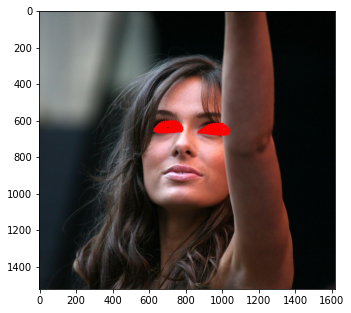

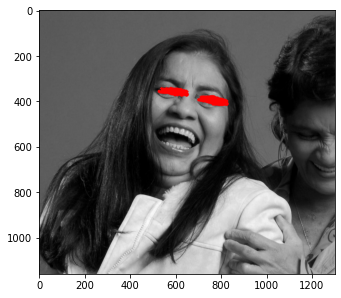

In [3]:
annotation_path = r"eyes_dataset/annotations"
image_path = r"eyes_dataset/train_images"
files = os.listdir(annotation_path)
contador = 0
for file in files:
    lines = []
    path = annotation_path + "/" + file
    if contador < 2:
        with open(path) as f:
            lines = f.readlines()
            count = 0
            for line in lines:
                count += 1
                if count == 1:
                    image_name = str(line.rstrip("\n")) + ".jpg" 
                    print(image_name)
                    images = os.listdir(image_path)
                    if image_name in images:
                        img = cv2.cv2.imread(image_path + "/"+image_name)
                        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                else:
                    x,y = line.split(" , ")
                    #print(line)
                    #print("Coordenada x: {}. Coordenada y: {}".format(x,y))
                    #116:135 - right eye
                    #136:155 - left eye
                    if count > 115 and count < 156:
                        cv2.circle(img, (round(float(x)),round(float(y))), radius=2, color=(255, 0, 0), thickness=10)
                        cv2.putText(img,str(count),(round(float(x)),round(float(y)+5)),cv2.FONT_HERSHEY_SIMPLEX,1,(255, 0, 0),5)
        contador = contador + 1
        print(contador)
        fig_index = "13"+str(contador)
        plt.figure(figsize=(18,19))
        plt.subplot(int(fig_index))
        plt.imshow(img)

100032540_1.jpg
1
1012675629_1.jpg
2


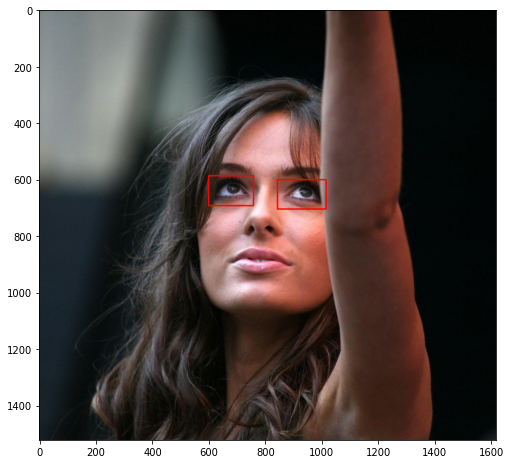

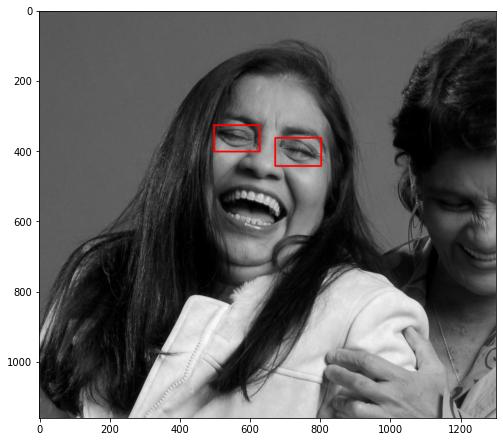

In [4]:
annotation_path = r"eyes_dataset/annotations"
image_path = r"eyes_dataset/train_images"
label_path = r"datasets/eyes/train/labels"
final_image_path = r"datasets/eyes/train/images"
files = os.listdir(annotation_path)
contador = 0
for file in files:
    lines = []
    path = annotation_path + "/" + file
    if contador < 2:
        with open(path) as f:
            lines = f.readlines()
            xre = []
            yre = []
            xle = []
            yle = []
            image_name = str(lines[0].rstrip("\n")) + ".jpg" 
            print(image_name)
            images = os.listdir(image_path)
            if image_name in images:
                img = cv2.cv2.imread(image_path + "/"+image_name)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                for i in range(115,135):
                    x,y = lines[i].split(" , ")
                    x = round(float(x))
                    y = round(float(y))
                    xre.append(x)
                    yre.append(y)
                xrmin = min(xre)-30
                yrmin = min(yre)-30
                xrmax = max(xre)+30
                yrmax = max(yre)+30    
                for i in range(135,155):
                    x,y = lines[i].split(" , ")
                    x = round(float(x))
                    y = round(float(y))
                    xle.append(x)
                    yle.append(y)
                xlmin = min(xle)-30
                ylmin = min(yle)-30
                xlmax = max(xle)+30
                ylmax = max(yle)+30
                cv2.rectangle(img, (xlmin,ylmin), (xlmax,ylmax) ,color=(255, 0, 0), thickness=3)
                cv2.rectangle(img, (xrmin,yrmin), (xrmax,yrmax) ,color=(255, 0, 0), thickness=3)
                #cv2.putText(img,str(count),(round(float(x)),round(float(y)+5)),cv2.FONT_HERSHEY_SIMPLEX,1,(255, 0, 0),5)
        contador = contador + 1
        print(contador)
        fig_index = "12"+str(contador)
        plt.figure(figsize=(18,19))
        plt.subplot(int(fig_index))
        plt.imshow(img)

In [28]:
def coordinates_maths(x,y,w,h):
    xmin = min(x)-30
    ymin = min(y)-30
    xmax = max(x)+30
    ymax = max(y)+30 
    xf = ((xmax + xmin) / 2) / w 
    yf = ((ymax + ymin) / 2) / h 
    wf = (xmax - xmin) / w
    hf = (ymax - ymin) / h
    return xf, yf, wf, hf

def create_dataset(name,label_path,image_path,image,xre,yre,xle,yle):
    txt_name = name + ".txt"
    image_name = name + ".jpg"

    height, width = image.shape[0] , image.shape[1] 
    path = os.path.join(label_path,txt_name)
    
    if os.path.isdir(label_path) == False:
        actual_path = os.getcwd()
        try:
            directory = actual_path + "/" + label_path
            os.makedirs(directory)
        except OSError:
            print ("Creation of the directory %s failed" % directory)
        else:
            print ("Successfully created the directory %s " % directory)
            
    txt_file = open(path, 'w')
    xr, yr, wr, hr = coordinates_maths(xre,yre,width,height)
    xl, yl, wl, hl = coordinates_maths(xle,yle,width,height)
    clss = 0
    right_eye = str(clss) + ' ' + str(xr) + ' ' + str(yr) + ' ' + str(wr) + ' ' + str(hr) + '\n'
    txt_file.write(right_eye)
    left_eye = str(clss) + ' ' + str(xl) + ' ' + str(yl) + ' ' + str(wl) + ' ' + str(hl) + '\n'
    txt_file.write(left_eye)
    txt_file.close()
    
    final_path = image_path + "/" + image_name
    
    if os.path.isdir(image_path) == False:
        actual_path = os.getcwd()
        try:
            directory = actual_path + "/" + image_path
            os.makedirs(directory)
        except OSError:
            print ("Creation of the directory %s failed" % directory)
        else:
            print ("Successfully created the directory %s " % directory)
            
    cv2.imwrite(final_path, image)

In [26]:
def comprobar_train_dataset(index):
    label_path = r"datasets/eyes/train/labels"
    image_path = r"datasets/eyes/train/images"
    file = os.listdir(image_path)[index]
    txt_file = file.split(".")[0] + ".txt"
    img = cv2.cv2.imread(image_path + "/" + file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    heigth, width = img.shape[0],img.shape[1]
    label = os.listdir(label_path)
    print(txt_file)
    if txt_file in label:
        lines = []
        txt_path = label_path + "/" + txt_file
        with open(txt_path) as f:
            lines = f.readlines()
            print(lines)
            print(lines[0])
            print(lines[1])
            right_eye = lines[0].split(' ')
            left_eye = lines[1].split(' ')
            print(right_eye)
            print(left_eye)
            xr, yr, wr, hr = float(right_eye[1]), float(right_eye[2]), float(right_eye[3]), float(right_eye[4])
            xl, yl, wl, hl = float(left_eye[1]), float(left_eye[2]), float(left_eye[3]), float(left_eye[4])
            
            xri, xrf, yri, yrf = round((xr - wr/2) * width), round((xr + wr/2) * width), round((yr - hr/2) * heigth), round((yr + hr/2) * heigth)
            xli, xlf, yli, ylf = round((xl - wl/2) * width), round((xl + wl/2) * width), round((yl - hl/2) * heigth), round((yl + hl/2) * heigth)
            
            print(xri)
            print(xrf)
            print(yri)
            print(yrf)
            print(xli)
            print(xlf)
            print(yli)
            print(ylf)
            
    cv2.rectangle(img, (xli,yli), (xlf,ylf) ,color=(255, 0, 0), thickness=3)
    cv2.rectangle(img, (xri,yri), (xrf,yrf) ,color=(255, 0, 0), thickness=3)
    plt.figure(figsize=(18,19))
    plt.subplot(121)
    plt.imshow(img)

In [29]:
annotation_path = r"eyes_dataset/annotations"
image_path = r"eyes_dataset/train_images"
label_path = r"datasets/eyes/train/labels"
final_image_path = r"datasets/eyes/train/images"
files = os.listdir(annotation_path)
contador = 0
for file in files:
    lines = []
    path = annotation_path + "/" + file
    if contador < 2:
        with open(path) as f:
            lines = f.readlines()
            xre = []
            yre = []
            xle = []
            yle = []
            archive_name = str(lines[0].rstrip("\n"))
            image_name = archive_name + ".jpg" 
            images = os.listdir(image_path)
            if image_name in images:
                img = cv2.cv2.imread(image_path + "/"+image_name)
                for i in range(115,135):
                    x,y = lines[i].split(" , ")
                    x = round(float(x))
                    y = round(float(y))
                    xre.append(x)
                    yre.append(y)   
                for i in range(135,155):
                    x,y = lines[i].split(" , ")
                    x = round(float(x))
                    y = round(float(y))
                    xle.append(x)
                    yle.append(y)
                create_dataset(archive_name,label_path,final_image_path,img,xre,yre,xle,yle)

Successfully created the directory C:\Users\guill\Desktop\INDIZEN\Capstone\YOLOV5/datasets/eyes/train/labels 
Successfully created the directory C:\Users\guill\Desktop\INDIZEN\Capstone\YOLOV5/datasets/eyes/train/images 


In [32]:
annotation_path = r"eyes_dataset/annotations"
image_path = r"eyes_dataset/test_images"
label_path = r"datasets/eyes/validate/labels"
final_image_path = r"datasets/eyes/validate/images"
files = os.listdir(annotation_path)
contador = 0
for file in files:
    lines = []
    path = annotation_path + "/" + file
    if contador < 2:
        with open(path) as f:
            lines = f.readlines()
            xre = []
            yre = []
            xle = []
            yle = []
            archive_name = str(lines[0].rstrip("\n"))
            image_name = archive_name + ".jpg" 
            images = os.listdir(image_path)
            if image_name in images:
                img = cv2.cv2.imread(image_path + "/"+image_name)
                for i in range(115,135):
                    x,y = lines[i].split(" , ")
                    x = round(float(x))
                    y = round(float(y))
                    xre.append(x)
                    yre.append(y)   
                for i in range(135,155):
                    x,y = lines[i].split(" , ")
                    x = round(float(x))
                    y = round(float(y))
                    xle.append(x)
                    yle.append(y)
                create_dataset(archive_name,label_path,final_image_path,img,xre,yre,xle,yle)

Successfully created the directory C:\Users\guill\Desktop\INDIZEN\Capstone\YOLOV5/datasets/eyes/validate/labels 
Successfully created the directory C:\Users\guill\Desktop\INDIZEN\Capstone\YOLOV5/datasets/eyes/validate/images 


100040721_1.txt
['0 0.5685314685314685 0.3849431818181818 0.14405594405594405 0.10227272727272728\n', '0 0.4433566433566434 0.37855113636363635 0.14265734265734265 0.10369318181818182\n']
0 0.5685314685314685 0.3849431818181818 0.14405594405594405 0.10227272727272728

0 0.4433566433566434 0.37855113636363635 0.14265734265734265 0.10369318181818182

['0', '0.5685314685314685', '0.3849431818181818', '0.14405594405594405', '0.10227272727272728\n']
['0', '0.4433566433566434', '0.37855113636363635', '0.14265734265734265', '0.10369318181818182\n']
355
458
235
307
266
368
230
303


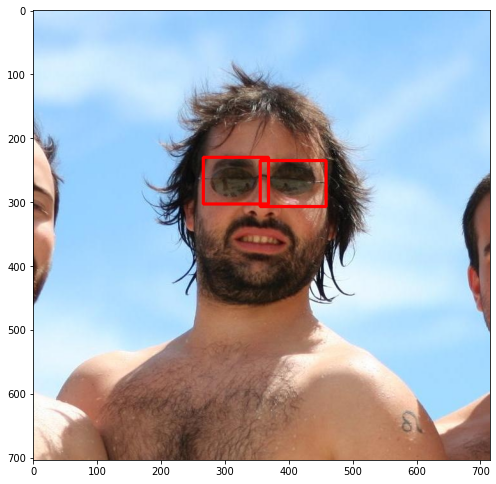

In [31]:
comprobar_train_dataset(1)

In [ ]:
!cd C:\Users\guill\Desktop\INDIZEN\Capstone\YOLOV5\yolov5-master-ultralytics && python train.py  --epochs 500 --data eyes.yaml --weights yolov5s.pt --workers 2

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import uuid   # Unique identifier
import os
import time
from skimage.transform import resize
from keras.models import load_model
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

In [5]:
path = r"datasets"
files = [f for f in os.listdir(path)]
print(files)

['coco128', 'eyes', 'faces', 'total_eyes']


In [7]:
path = r'video/prueba.mp4'
cap = cv2.VideoCapture(path)
path = "video"
contador = 0
if (cap.isOpened()== False):
    print("Error opening video stream or file")
    
while cap.isOpened():
    ret, frame = cap.read()
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

Error opening video stream or file


In [5]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='C:/Users/guill/Desktop/INDIZEN/Capstone/YOLOV5/yolov5-master-ultralytics/runs/train/exp18/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\guill/.cache\torch\hub\master.zip
requirements: torchvision>=0.8.1 not found and is required by YOLOv5, attempting auto-update...
requirements: Command 'pip install 'torchvision>=0.8.1' ' returned non-zero exit status 1.
YOLOv5  2022-5-16 Python-3.8.5 torch-1.10.2+cpu CPU

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [53]:
cap = cv2.VideoCapture('C:/Users/guill/Desktop/INDIZEN/Capstone/YOLOV5/prueba_mauricio.mp4')
path = "video"
contador = 0
clf_model = load_model('C:/Users/guill/Desktop/INDIZEN/Capstone/Repositorio/CV_Capstone/python/model/eye_classifier1.h5')
if (cap.isOpened()== False):
    print("Error opening video stream or file")
    
while cap.isOpened():
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    start_time = time.time()
    result = model(frame)
    end_time = time.time()
    elapsed = end_time - start_time
    print("Elapsed time: {}".format(elapsed))
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    df = result.pandas().xyxy[0]
    if len(df)>2:
        df2 = df
    for j in range(len(df)):
        if float(df["confidence"][j]) > 0.5:
            xmin = int(df["xmin"][j])
            xmax = int(df["xmax"][j])
            ymin = int(df["ymin"][j])
            ymax = int(df["ymax"][j])
            eye_image = frame[ymin:ymax, xmin:xmax]
            eye_scaled = resize(eye_image, (200, 200), preserve_range=True).astype(np.uint8)
            eye_scaled_norm = eye_scaled.astype("float32") / 255
            #out_probabilities = clf_model.predict(np.reshape(eye_scaled_norm,(1,200,200,3)))
            #result = "OPENED" + str(out_probabilities[0][0]) if out_probabilities[0][0] > 0.5 else "CLOSED " + str(out_probabilities[0][0])
            #result = "OPENED" if out_probabilities[0][0] > 0.5 else "CLOSED "
            #text_x = int(xmin)
            #text_y = int(ymin-20)
            name = "eye_mauricio" + str(contador) + ".jpg"
            save_path = os.path.join(path,name)
            cv2.imwrite(save_path,eye_scaled)
            contador += 1
            #DRAW TEXT OVER EYES
            cv2.rectangle(frame,(xmin,ymin),(xmax,ymax),color=(255, 0, 0), thickness=3)
            #cv2.putText(frame, result, (text_x, text_y), cv2.FONT_HERSHEY_PLAIN, 1, (255,0,0), 1, cv2.LINE_AA)
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

Elapsed time: 0.11768198013305664
Elapsed time: 0.12600016593933105
Elapsed time: 0.1236426830291748
Elapsed time: 0.11299967765808105
Elapsed time: 0.11799836158752441
Elapsed time: 0.11265897750854492
Elapsed time: 0.11200141906738281
Elapsed time: 0.11299872398376465
Elapsed time: 0.13899827003479004
Elapsed time: 0.13699674606323242
Elapsed time: 0.11399984359741211
Elapsed time: 0.11499929428100586
Elapsed time: 0.12900137901306152
Elapsed time: 0.12899994850158691
Elapsed time: 0.12867188453674316
Elapsed time: 0.11099743843078613
Elapsed time: 0.1790027618408203
Elapsed time: 0.12000012397766113
Elapsed time: 0.11865687370300293
Elapsed time: 0.11900019645690918
Elapsed time: 0.14593982696533203
Elapsed time: 0.12268519401550293
Elapsed time: 0.1230006217956543
Elapsed time: 0.12599802017211914
Elapsed time: 0.1309986114501953
Elapsed time: 0.11299943923950195
Elapsed time: 0.1139993667602539
Elapsed time: 0.1530003547668457
Elapsed time: 0.12169575691223145
Elapsed time: 0.1159

In [37]:
img = os.path.join("video","eye_mauricio4.jpg")
image = cv2.imread(img)
a = resize(image, (200, 200), preserve_range=True).astype(np.uint8)
photo = a.astype("float32") / 255
out_probabilities = clf_model.predict(np.reshape(photo,(1,200,200,3)))
result = "OPENED" + str(out_probabilities[0][0]) if out_probabilities[0][0] > 0.5 else "CLOSED " + str(out_probabilities[0][0])
print(result)

CLOSED 0.28436145


In [27]:
img = os.path.join("C:/Users/guill/Desktop/INDIZEN/Capstone/data/test/Closed","_77.jpg")
image = cv2.imread(img)
a = resize(image, (200, 200), preserve_range=True).astype(np.uint8)
photo = a.astype("float32") / 255
out_probabilities = clf_model.predict(np.reshape(photo,(1,200,200,3)))
result = "OPENED" + str(out_probabilities[0][0]) if out_probabilities[0][0] > 0.5 else "CLOSED " + str(out_probabilities[0][0])
print(result)

CLOSED 1.6813952e-09


In [38]:
def load_images(root):
    #Method to load all the images and create X data and labels
    data = []
    for category in sorted(os.listdir(root)):
        for file in sorted(os.listdir(os.path.join(root, category))):
            data.append((category, os.path.join(root, category,  file)))
    df = pd.DataFrame(data, columns=['class', 'file_path'])
    df['class'] = LabelEncoder().fit_transform(df['class'].values)
    photos, labels = list(), list()
    for index,row in df.iterrows():
        photo = load_img(row['file_path'], target_size=(200, 200))
        photo = img_to_array(photo)
        photo = photo.astype("float32") / 255
        photos.append(photo)
        labels.append(row['class'])
    X = np.asarray(photos)
    y = np.asarray(labels)
    return X, y

In [52]:
train_root = r'video/fotos'
x_train, y_train = load_images(train_root)
y_predicted = []
for i in range(len(y_train)):
    out_probabilities = clf_model.predict(x_train[i:i+1])
    number_detected = 1 if out_probabilities[0][0] > 0.5 else 0
    y_predicted.append(number_detected)

a = clf_model.evaluate(x_train, y_train)
print(classification_report(y_train, y_predicted))
print(confusion_matrix(y_train, y_predicted))

15/15 [==============================] - 2s 146ms/step - loss: 1.5556 - accuracy: 0.6724
              precision    recall  f1-score   support

           0       0.63      0.80      0.70       227
           1       0.75      0.55      0.63       240

    accuracy                           0.67       467
   macro avg       0.69      0.68      0.67       467
weighted avg       0.69      0.67      0.67       467

[[182  45]
 [108 132]]


In [55]:
!python --version

Python 3.6.13 :: Anaconda, Inc.
